# Least – Squares Problem Project

นายกฤดากร เชือกไหมทอง 6424650064

นายณัฐธีร์ พิมพ์ภสันต์ 6424650304

นางสาวเสาวลักษณ์ ชมชื่น 6424650486

นางสาวเบญฤญา คำคงศักดิ์ 6424650551

นายอิทธิเชรษฐ์ ธิติจรูญโรจน์ 6424650650

In [36]:
import numpy as np
np.random.seed(46)
import seaborn as sb
import seaborn as sns
import pandas as pd
import numpy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.linear_model import Ridge as Ridge 
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
%matplotlib inline
lireg = LinearRegression()

# ทําการแสดงข้อมูล

In [37]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'
df = pd.read_csv(url, usecols=[1,3,4,7],encoding= 'unicode_escape')
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Dew point temperature(°C)
0,254,-5.2,37,-17.6
1,204,-5.5,38,-17.6
2,173,-6.0,39,-17.7
3,107,-6.2,40,-17.6
4,78,-6.0,36,-18.6


In [38]:
df.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Dew point temperature(°C)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,4.073813
std,644.997468,11.944825,20.362413,13.060369
min,0.000000,-17.800000,0.000000,-30.600000
25%,191.000000,3.500000,42.000000,-4.700000
50%,504.500000,13.700000,57.000000,5.100000
75%,1065.250000,22.500000,74.000000,14.800000
max,3556.000000,39.400000,98.000000,27.200000


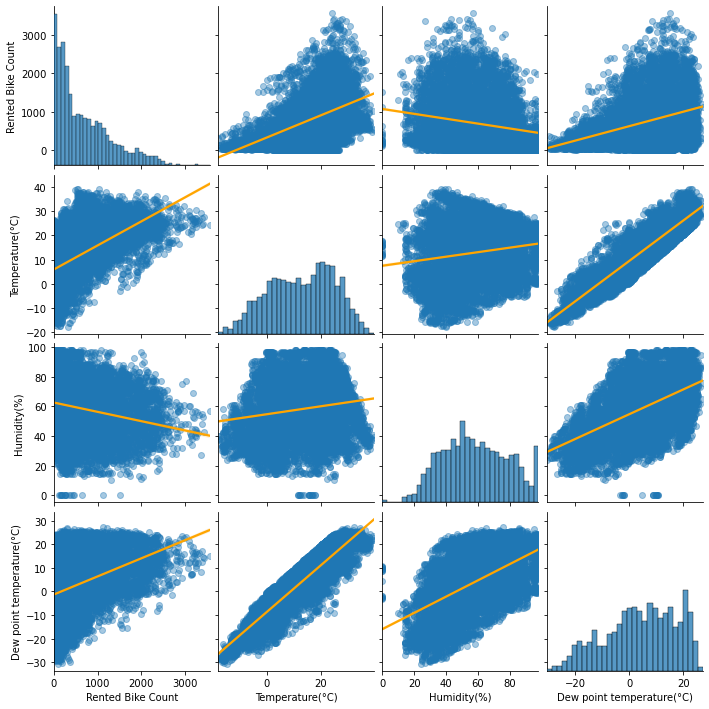

In [39]:
sb.pairplot(df, kind='reg', plot_kws={'scatter_kws':{'alpha' :0.4},'line_kws':{'color': 'orange'}})

<AxesSubplot:>

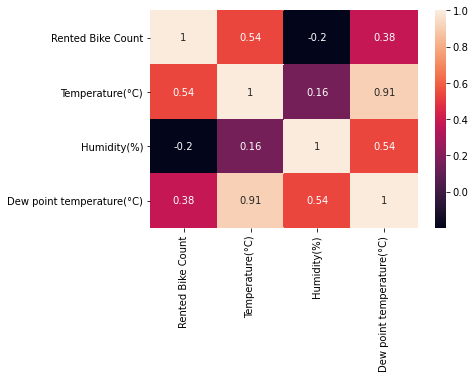

In [40]:
sns.heatmap(df.corr(), annot=True)

In [41]:
df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Dew point temperature(°C)
Rented Bike Count,1.000000,0.538558,-0.199780,0.379788
Temperature(°C),0.538558,1.000000,0.159371,0.912798
Humidity(%),-0.199780,0.159371,1.000000,0.536894
Dew point temperature(°C),0.379788,0.912798,0.536894,1.000000


In [42]:
x = df[['Temperature(°C)','Humidity(%)','Dew point temperature(°C)']]
y = df['Rented Bike Count']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=49)

In [44]:
from sklearn import preprocessing
x_train

,Temperature(°C),Humidity(%),Dew point temperature(°C)
2172,0.5,46,-9.8
1101,3.4,59,-3.8
5362,26.7,88,24.5
5475,24.8,80,21.1
3396,24.3,14,-4.9
...,...,...,...
8050,8.1,51,-1.4
7924,8.8,61,1.6
3254,13.7,50,3.4
5805,33.1,48,20.6


In [45]:
x_test

,Temperature(°C),Humidity(%),Dew point temperature(°C)
4621,23.7,49,12.3
511,-0.3,72,-4.7
762,0.8,34,-13.3
7158,11.2,70,5.9
3715,15.5,46,3.9
...,...,...,...
3175,7.6,54,-1.1
632,-10.2,35,-22.7
3345,12.4,29,-5.1
3663,17.0,90,15.3


In [46]:
y_train

2172     311
1101     334
5362     746
5475     372
3396    1130
        ... 
8050     696
7924     233
3254    1083
5805    1875
426      281
Name: Rented Bike Count, Length: 5840, dtype: int64

In [47]:
y_test

4621    1033
511      283
762      218
7158     132
3715    1890
        ... 
3175    1054
632      502
3345     316
3663     143
5376    1006
Name: Rented Bike Count, Length: 2920, dtype: int64

In [48]:
lireg.fit(x_train,y_train)

LinearRegression()

In [49]:
lireg.coef_

array([ 21.28465888, -11.62989991,  10.38383519])

In [50]:
y_pred = lireg.predict(x_test)
y_pred

array([1125.97463636,  171.12992687,  547.17826566, ...,  937.37725686,
        537.693031  ,  821.82884813])

In [51]:
dc=pd.concat([y_test.reset_index(),pd.Series(y_pred,name='y_predicted')],axis='columns')
dc.head(20)

,index,Rented Bike Count,y_predicted
0,4621,1033,1125.974636
1,511,283,171.129927
2,762,218,547.178266
3,7158,132,549.231957
4,3715,1890,899.105918
5,40,618,602.200191
6,7254,290,549.743608
7,1471,124,-37.370483
8,4223,1209,885.861860
9,6415,490,883.615802


In [52]:
lireg.fit(x_train,y_train)
y_pred = lireg.predict(x_test)

In [53]:
print('r2_square : {:.4f}'.format(lireg.score(x_test,y_test)))
import sklearn.metrics as metrics

print('Root mean squared error :{:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


r2_square : 0.3949
Root mean squared error :504.5529


In [54]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [55]:
test_pred = lireg.predict(x_test)
print_evaluate(y_test, test_pred)


MAE: 369.9588824047851
MSE: 254573.58159579063
RMSE: 504.5528531242199
R2 Square 0.3949308269413174


In [56]:
pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,369.958882,254573.581596,504.552853,0.394931


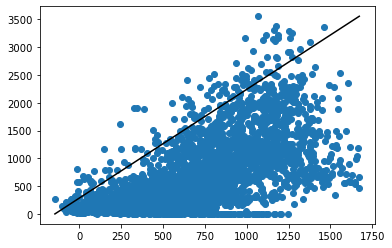

In [57]:
pred = lireg.predict(x_test)
plt.scatter(pred, y_test)
plt.plot([y_pred.min(),y_pred.max()],[y_test.min(),y_test.max()],color = 'black')

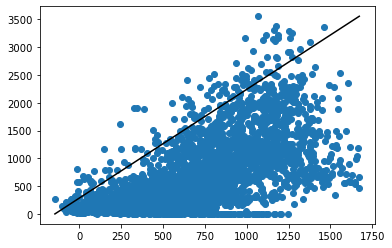

In [58]:
pred = lireg.predict(x_test)
plt.scatter(y_pred, y_test)
plt.plot([y_pred.min(),y_pred.max()],[y_test.min(),y_test.max()],color = 'black')

In [59]:
co=np.round(lireg.coef_.ravel(),2)
column=['Temperature(°C)','Humidity(%)','Dew point temperature(°C)']
coef=pd.DataFrame(co,column)
coef.columns=["coefficient"]
coef

,coefficient
Temperature(°C),21.28
Humidity(%),-11.63
Dew point temperature(°C),10.38


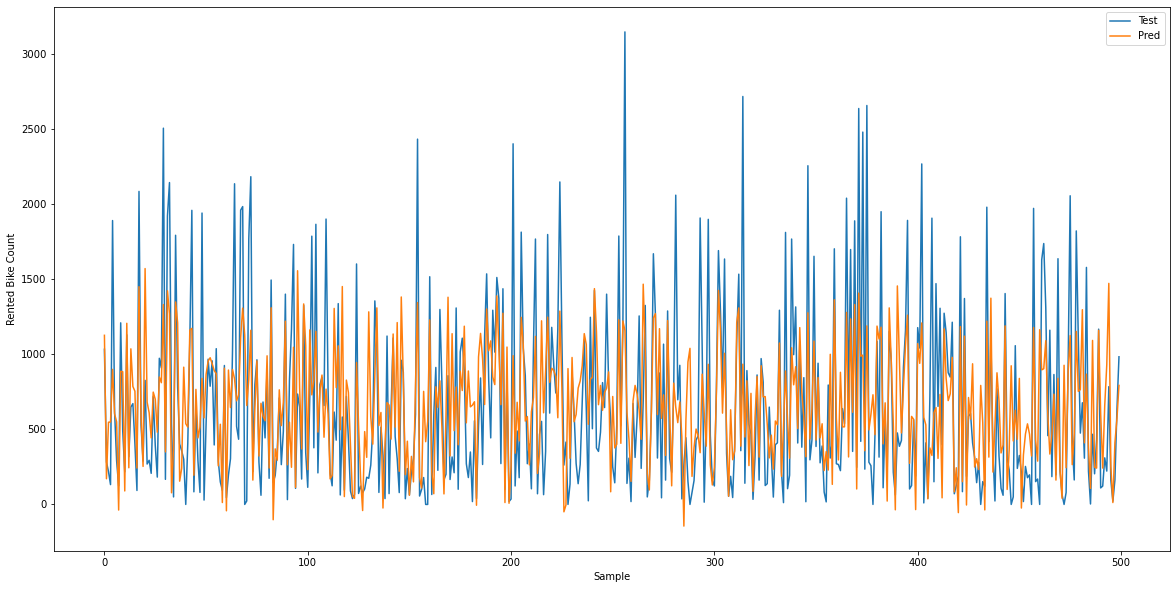

In [60]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(y_test.tolist()[0:500])
plt.plot(y_pred.tolist()[0:500])
plt.xlabel('Sample')
plt.ylabel('Rented Bike Count')
plt.legend(['Test','Pred'])

In [61]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [62]:
x = df[['Temperature(°C)','Humidity(%)','Dew point temperature(°C)']]
y = df['Rented Bike Count']

In [63]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [64]:
regr_cv = RidgeCV(alphas=[50, 100, 150, 200])

In [65]:
model_cv = regr_cv.fit(x_std, y)

In [66]:
model_cv.alpha_

50

In [67]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=20)
model.fit(x_train, y_train)
pred = model.predict(x_test)
test_pred = model.predict(x_test)

In [68]:
pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'rmse', 'r2_square'])


,Model,MAE,MSE,rmse,r2_square
0,Ridge Regression,369.956439,254572.801518,504.55208,0.394933


In [69]:
 pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,369.956439,254572.801518,504.55208,0.394933


In [70]:
print_evaluate(y_test, test_pred)

MAE: 369.95643941253024
MSE: 254572.80151828687
RMSE: 504.5520800851849
R2 Square 0.39493268102549683
